# NeurIPS 2021 Submission 4400
# A Normative and Biologically Plausible Algorithm for Independent Component Analysis
## Fig.2 Panel B. 
### Notebook for visualizing the ICA task on audio separation task

In [2]:

from scipy.io import wavfile
#from FastICA import FastICA
from FOBI import FOBI
import utilities as utl
import numpy as np

import time
import pylab as pl
import string

import scipy
from scipy import signal
from scipy.io import wavfile
from scipy.stats import norm, kurtosis
#from FastICA import FastICA
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset




/Users/ybahroun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/Users/ybahroun/opt/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys


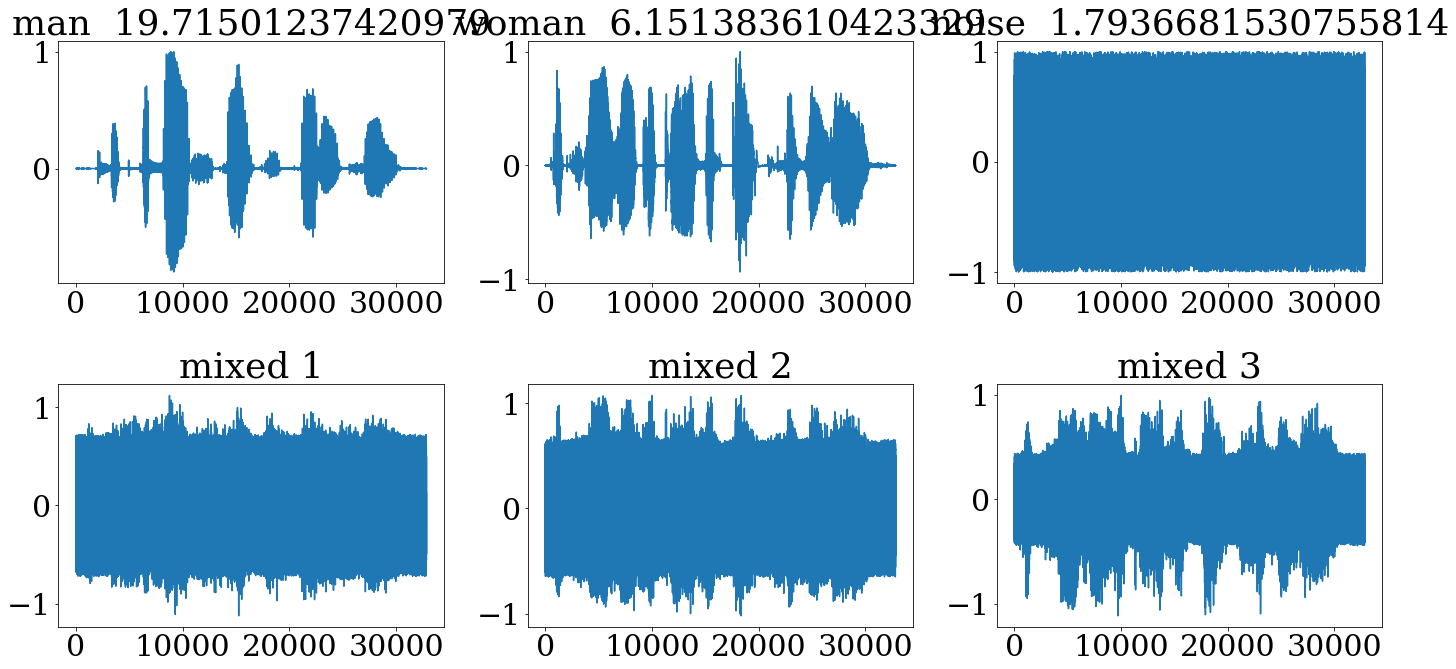

In [25]:
import numpy as np
import pylab as pl
from scipy.io import wavfile
import matplotlib.pyplot as plt

rate, man = wavfile.read('./sounds/MA02_04.wav')
rate, woman = wavfile.read('./sounds/FA01_03.wav')

man = man.astype('float32')
woman = woman.astype('float32')

man_max = np.max(man)
woman_max = np.max(woman)
man /= man_max
woman /= woman_max

shortest = min(len(man), len(woman))
woman = woman[:shortest]
man = man[:shortest]


np.random.seed(101)
noise = np.random.uniform(-1, 1, len(man))
sources = np.stack((woman, man, noise))
A = np.random.uniform(-1, 1, (3, 3))
linear_mix = np.dot(A, sources)



rate =16000

figure = plt.figure(figsize=(20,10))

pl.subplot(231)
pl.plot(man)
pl.title('man'+'  '+str(kurtosis(man,fisher=False)))
pl.subplot(232)
pl.plot(woman)
pl.title('woman'+'  '+str(kurtosis(woman,fisher=False)))
pl.subplot(233)
pl.plot(noise)
pl.title('noise'+'  '+str(kurtosis(noise,fisher=False)))


pl.subplot(234)
pl.plot(linear_mix[0])
pl.title('mixed 1')
pl.subplot(235)
pl.plot(linear_mix[1])
pl.title('mixed 2')
pl.subplot(236)
pl.plot(linear_mix[2])
pl.title('mixed 3')

plt.tight_layout()
pl.show()

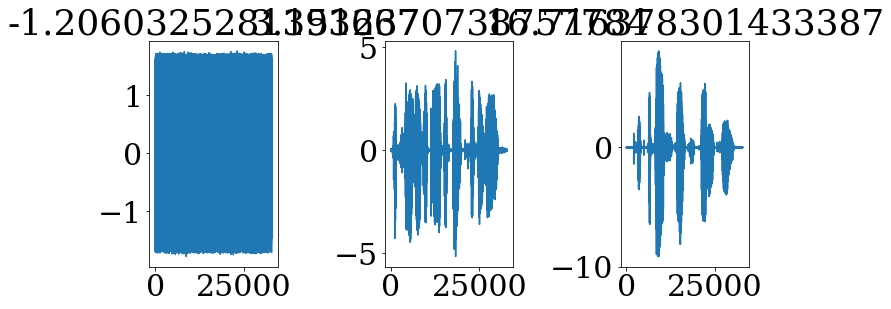

In [22]:
from FOBI import FOBI

signals = linear_mix
matrix = signals

whiteMatrix = utl.whitenMatrix(matrix)
X = whiteMatrix

# Unmixing matrix through FOBI
fobiW = FOBI(X)

# Get the original matrix using fobiW
fobiS = np.dot(fobiW.T, whiteMatrix)


figure = plt.figure(figsize=(10,5))

for iter_loop in range(3):
    plt.subplot(1,3,iter_loop+1)
    plt.plot(fobiS[iter_loop])
    plt.title(str(kurtosis(fobiS[iter_loop],fisher=True)))
plt.tight_layout()
plt.show()


In [7]:
# Run offline Single-layer SM-ICA


X_SM=(matrix) #mixed sources
dim_Zmixed=X_SM.shape[0]
num_samples_test= X_SM.shape[1]

# Parameters initialization
size_input1=dim_Zmixed
size_output=3

eta=0.01;
tau=0.75;
print(X_SM.shape)

(3, 32851)


In [8]:
# initialize W
W_off_SL=np.random.randn(size_output,size_input1)

# initialize M PSD
Gen_psd_M = np.random.randn(1000,size_output)
C = np.cov(Gen_psd_M.T)
M_off_SL =np.eye(size_output,size_output)#C 


1 0.004760265350341797


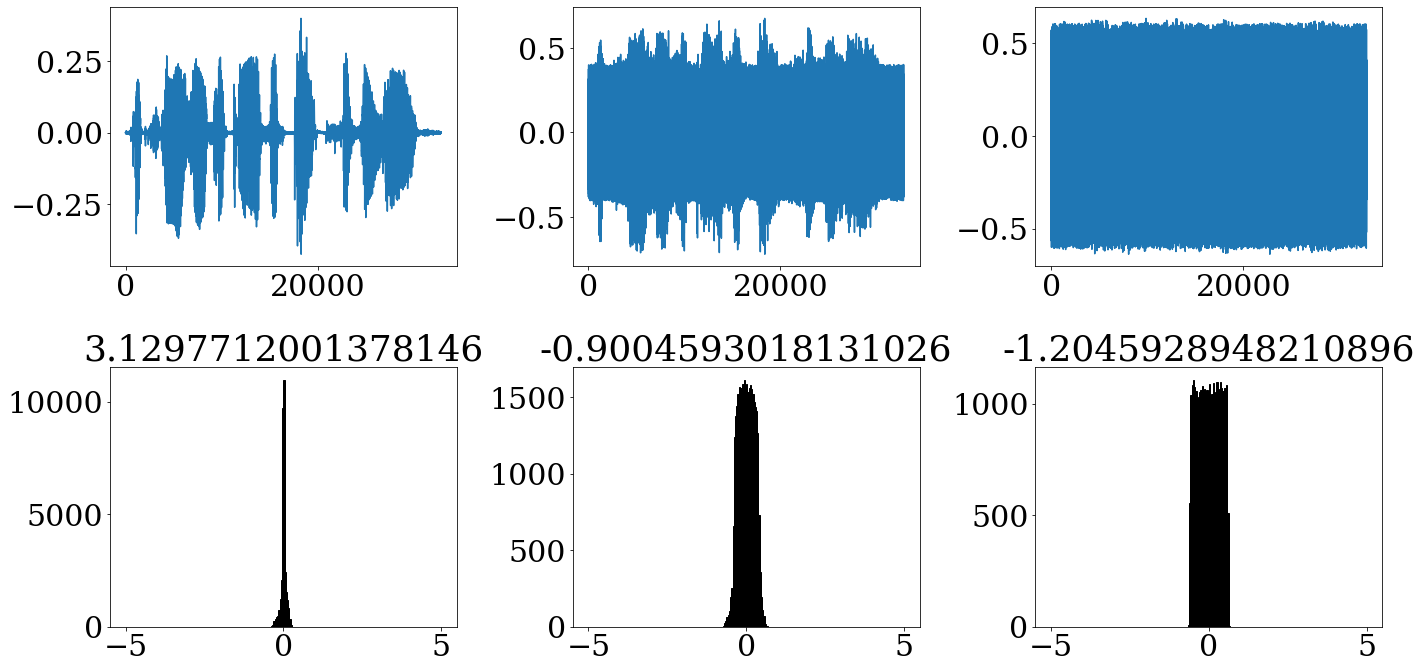

11112 10.181010007858276


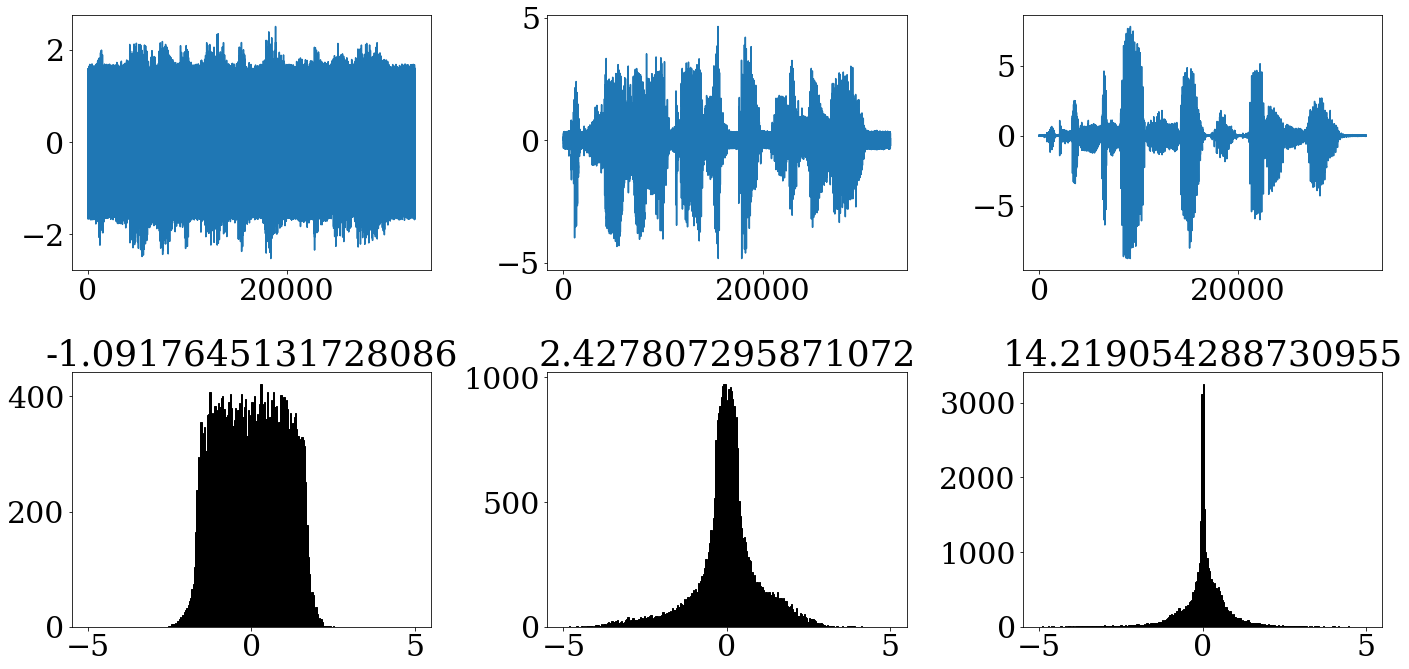

22223 21.47039008140564


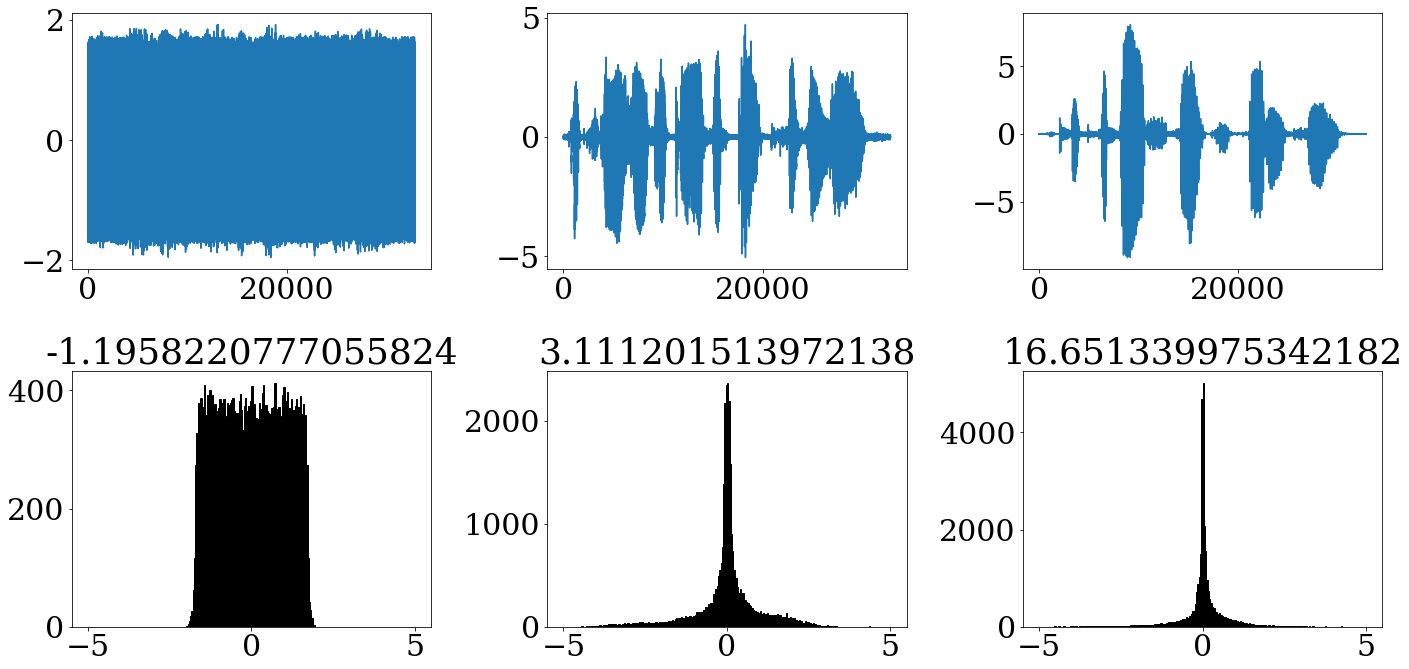

33334 32.55794811248779


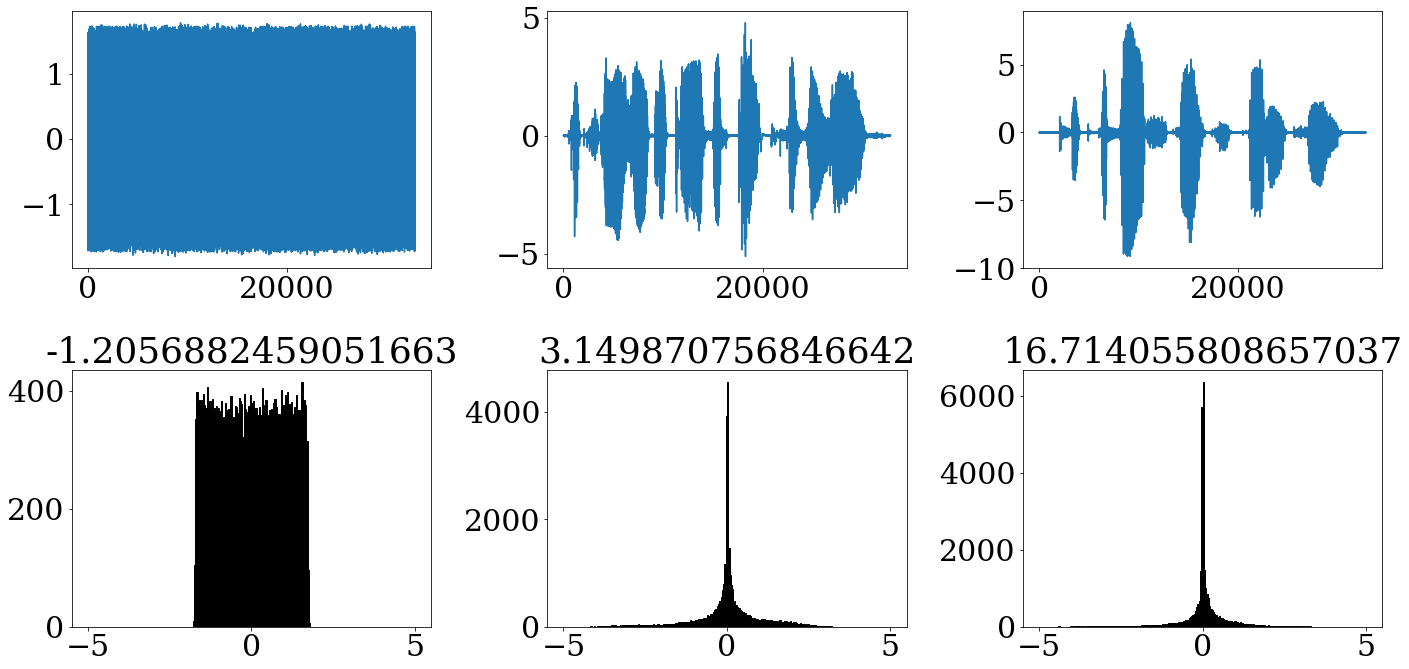

44445 43.899056911468506


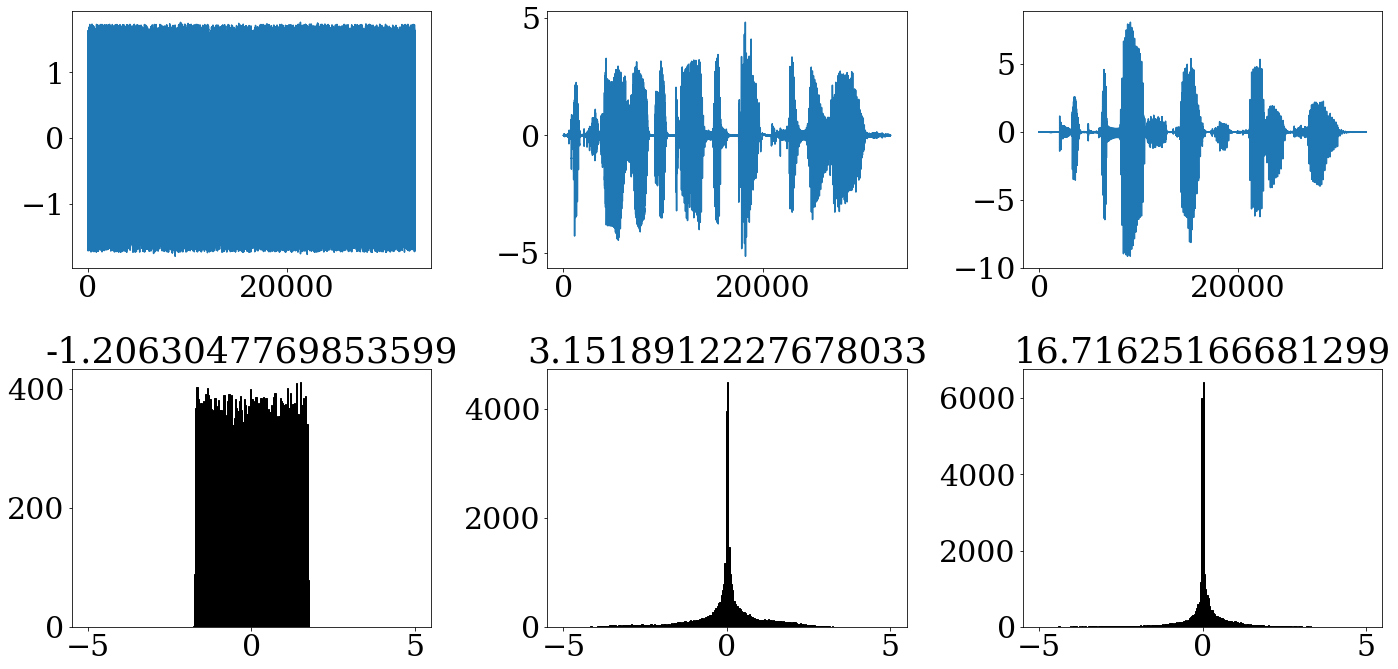

55556 55.859822273254395


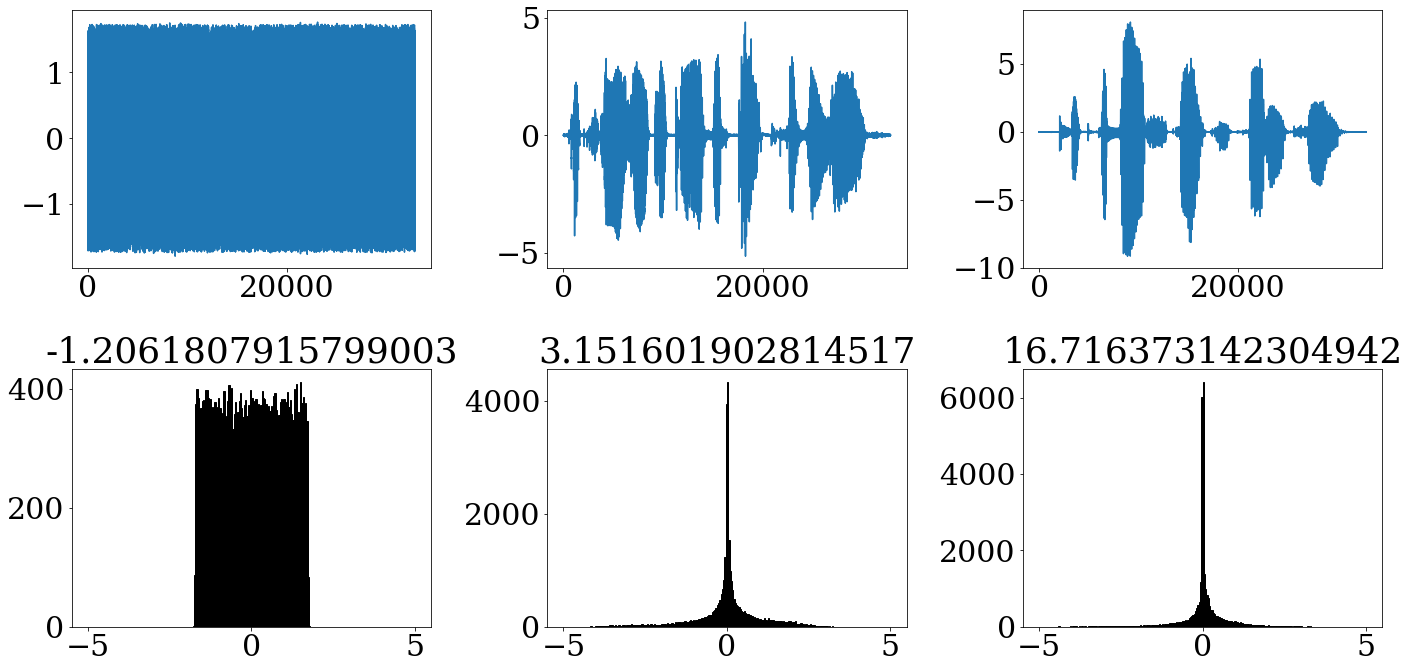

66667 66.993488073349


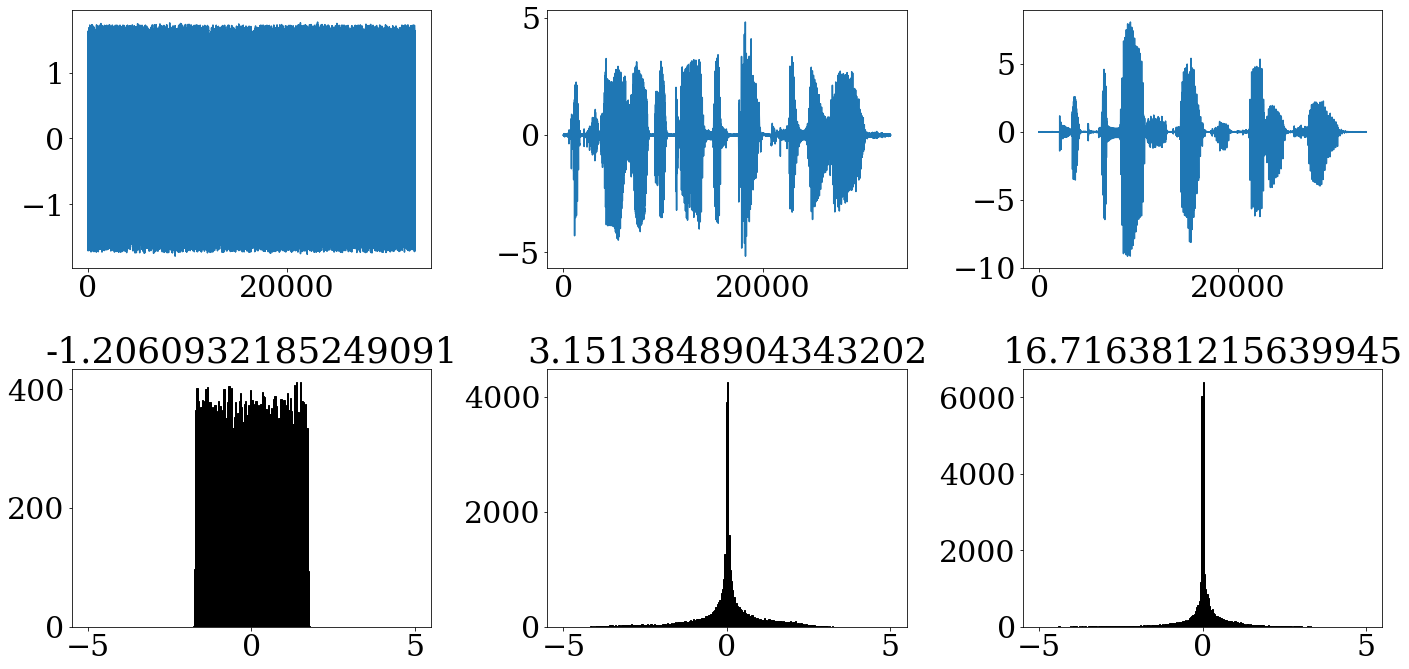

77778 79.29543995857239


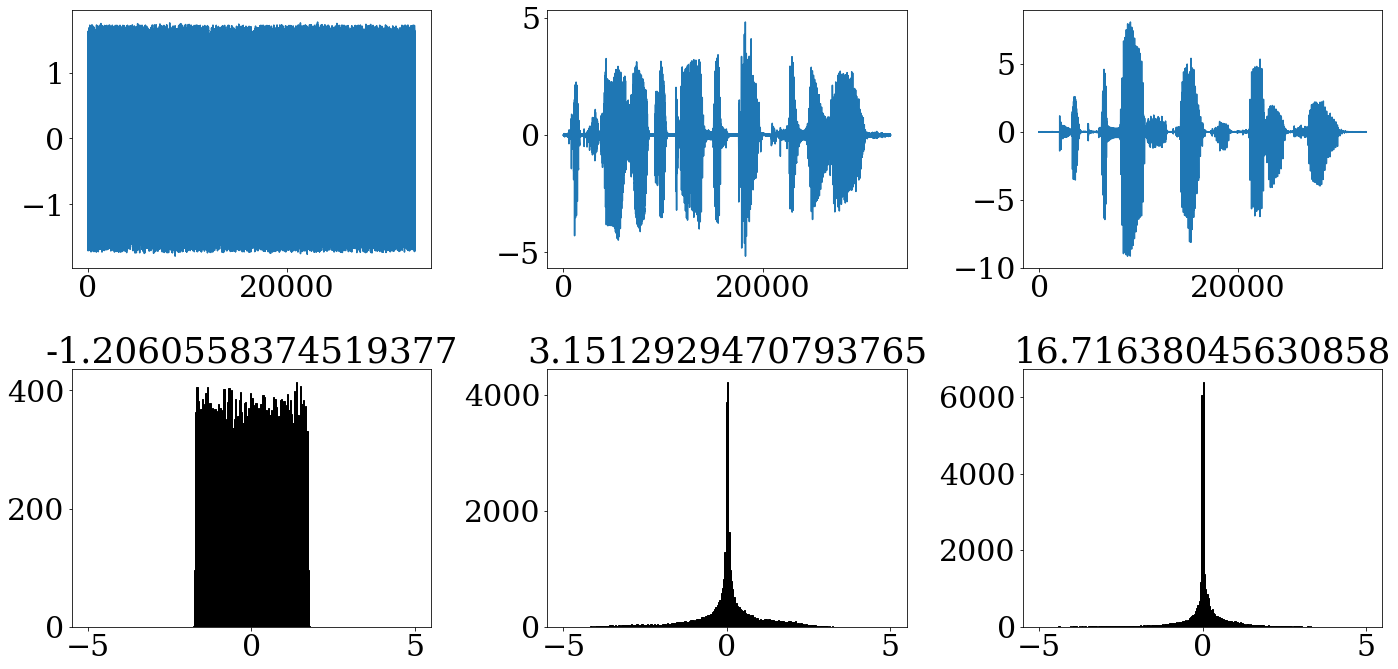

88889 90.98044919967651


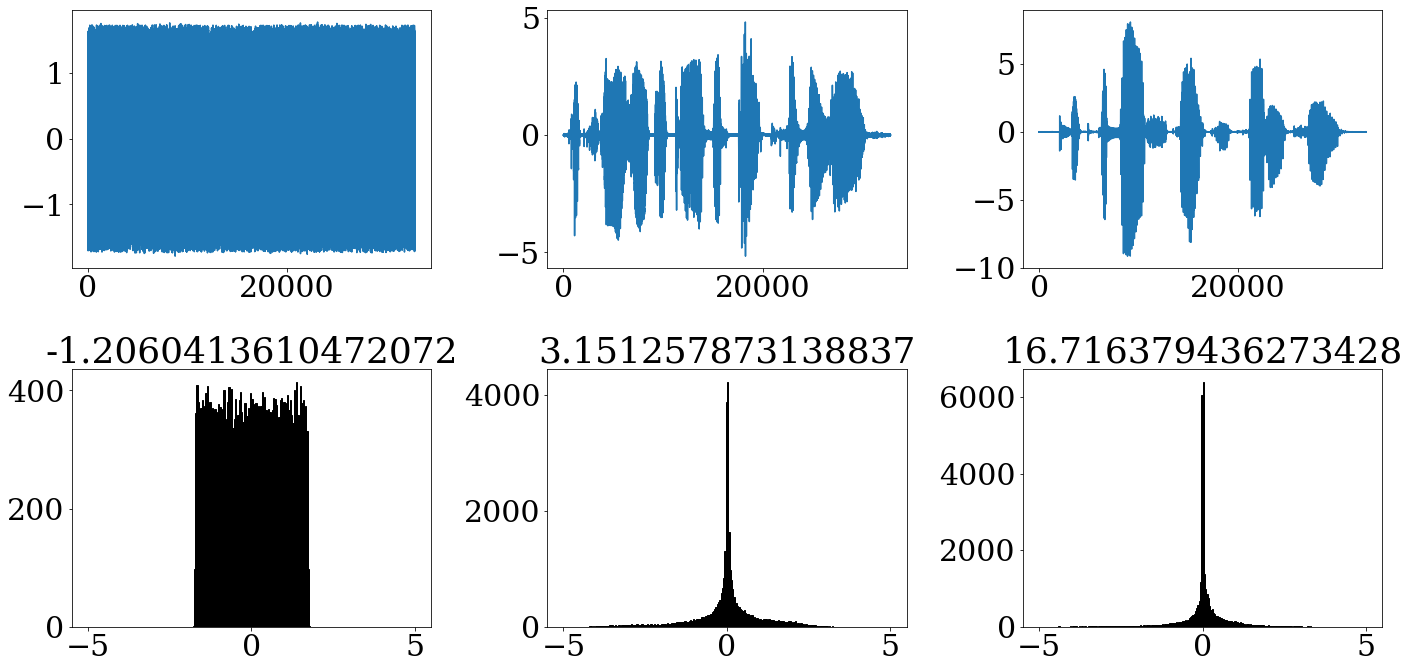

In [15]:
iter_idx = np.array([])
#all_indices_err=np.ceil(np.geomspace(1.0, 100000.0, num=50,endpoint=True))
all_indices_err=np.ceil(np.linspace(1.0, 100000.0, num=10,endpoint=True))


W_off_SL=np.random.randn(size_output,size_input1)

# Offline similarity update nonlin_alpha*C_SL@X_SM.T
# initialize M PSD
Gen_psd_M = np.random.randn(1000,size_output)
C = np.cov(Gen_psd_M.T)
M_off_SL =np.eye(size_output,size_output)

# Offline Training Single Layer
tic = time.time() 

Lambda_PCA=(kurtosis(fobiS.T,fisher=False))
eta=5*10**-4;
tau=0.85;
for iter in range(100000):
  
  ##Single-layer neural network output sources reconstruction
    C_SL=W_off_SL @ X_SM
    Y_SL= np.linalg.inv(M_off_SL) @ C_SL

  # used for the weight update of the second layer
    nonlin_alpha=(0+sum(Y_SL*Y_SL)**1)
    
  # Single Layer
    W_off_SL= W_off_SL + eta*( (1/num_samples_test)*Y_SL@X_SM.T - (1/num_samples_test)*nonlin_alpha*(np.diag(Lambda_PCA)@C_SL)@X_SM.T)
    M_off_SL= M_off_SL + (eta/tau)*( (1/num_samples_test)*Y_SL@Y_SL.T - np.eye(Lambda_PCA.shape[0]))
    

  # Single Layer

    np.ceil(np.geomspace(1.0, 100000.0, num=10,endpoint=True))
        
    if iter in all_indices_err:

        toc = time.time() - tic
        print(iter, toc)
        
        figure = plt.figure(figsize=(20,10))

        for iter_loop in range(size_output):
            plt.subplot(2,3,iter_loop+1)
            plt.plot((Y_SL)[iter_loop])
            plt.subplot(2,3,iter_loop+1+3)
            plt.hist(Y_SL[iter_loop], bins=256, range=(-5.0, 5.0), fc='k', ec='k')
            plt.title(str(kurtosis(Y_SL[iter_loop],fisher=True)))

        plt.tight_layout()
        plt.show()

In [16]:
# Rescaling for visualization purposes

Rescaled_Y=(((np.diag(1/(Y_SL.max(axis=1)-Y_SL.min(axis=1)) ))@( Y_SL )).T)
Rescaled_fobi=(((np.diag(1/(fobiS.max(axis=1)-fobiS.min(axis=1) )))@( fobiS )).T)
Rescaled_matrix = (((np.diag(1/(matrix.max(axis=1)-matrix.min(axis=1) )))@( matrix )).T)

all_x=sources
Rescaled_sources = (((np.diag(1/(all_x.max(axis=1)-all_x.min(axis=1) )))@( all_x )).T)


kurt_fobiS=np.zeros(fobiS.shape[0])
kurt_SM_ICA=np.zeros(fobiS.shape[0])
kurt_mixtures=np.zeros(fobiS.shape[0])
kurt_sources=np.zeros(fobiS.shape[0])

for iter_rg in range(fobiS.shape[0]):
    kurt_SM_ICA[iter_rg]= kurtosis(Rescaled_Y[:,iter_rg],fisher=True)
    kurt_fobiS[iter_rg]= kurtosis(Rescaled_fobi[:,iter_rg],fisher=True)
    kurt_mixtures[iter_rg]= kurtosis(Rescaled_matrix[:,iter_rg],fisher=True)
    
    kurt_sources[iter_rg]= kurtosis(Rescaled_sources[:,iter_rg],fisher=True)
    
arg_sort_SM_ICA = np.argsort(kurt_SM_ICA)
arg_sort_fobiS = np.argsort(kurt_fobiS)
arg_sort_mixture = np.argsort(kurt_mixtures)
arg_sort_sources = np.argsort(kurt_sources)



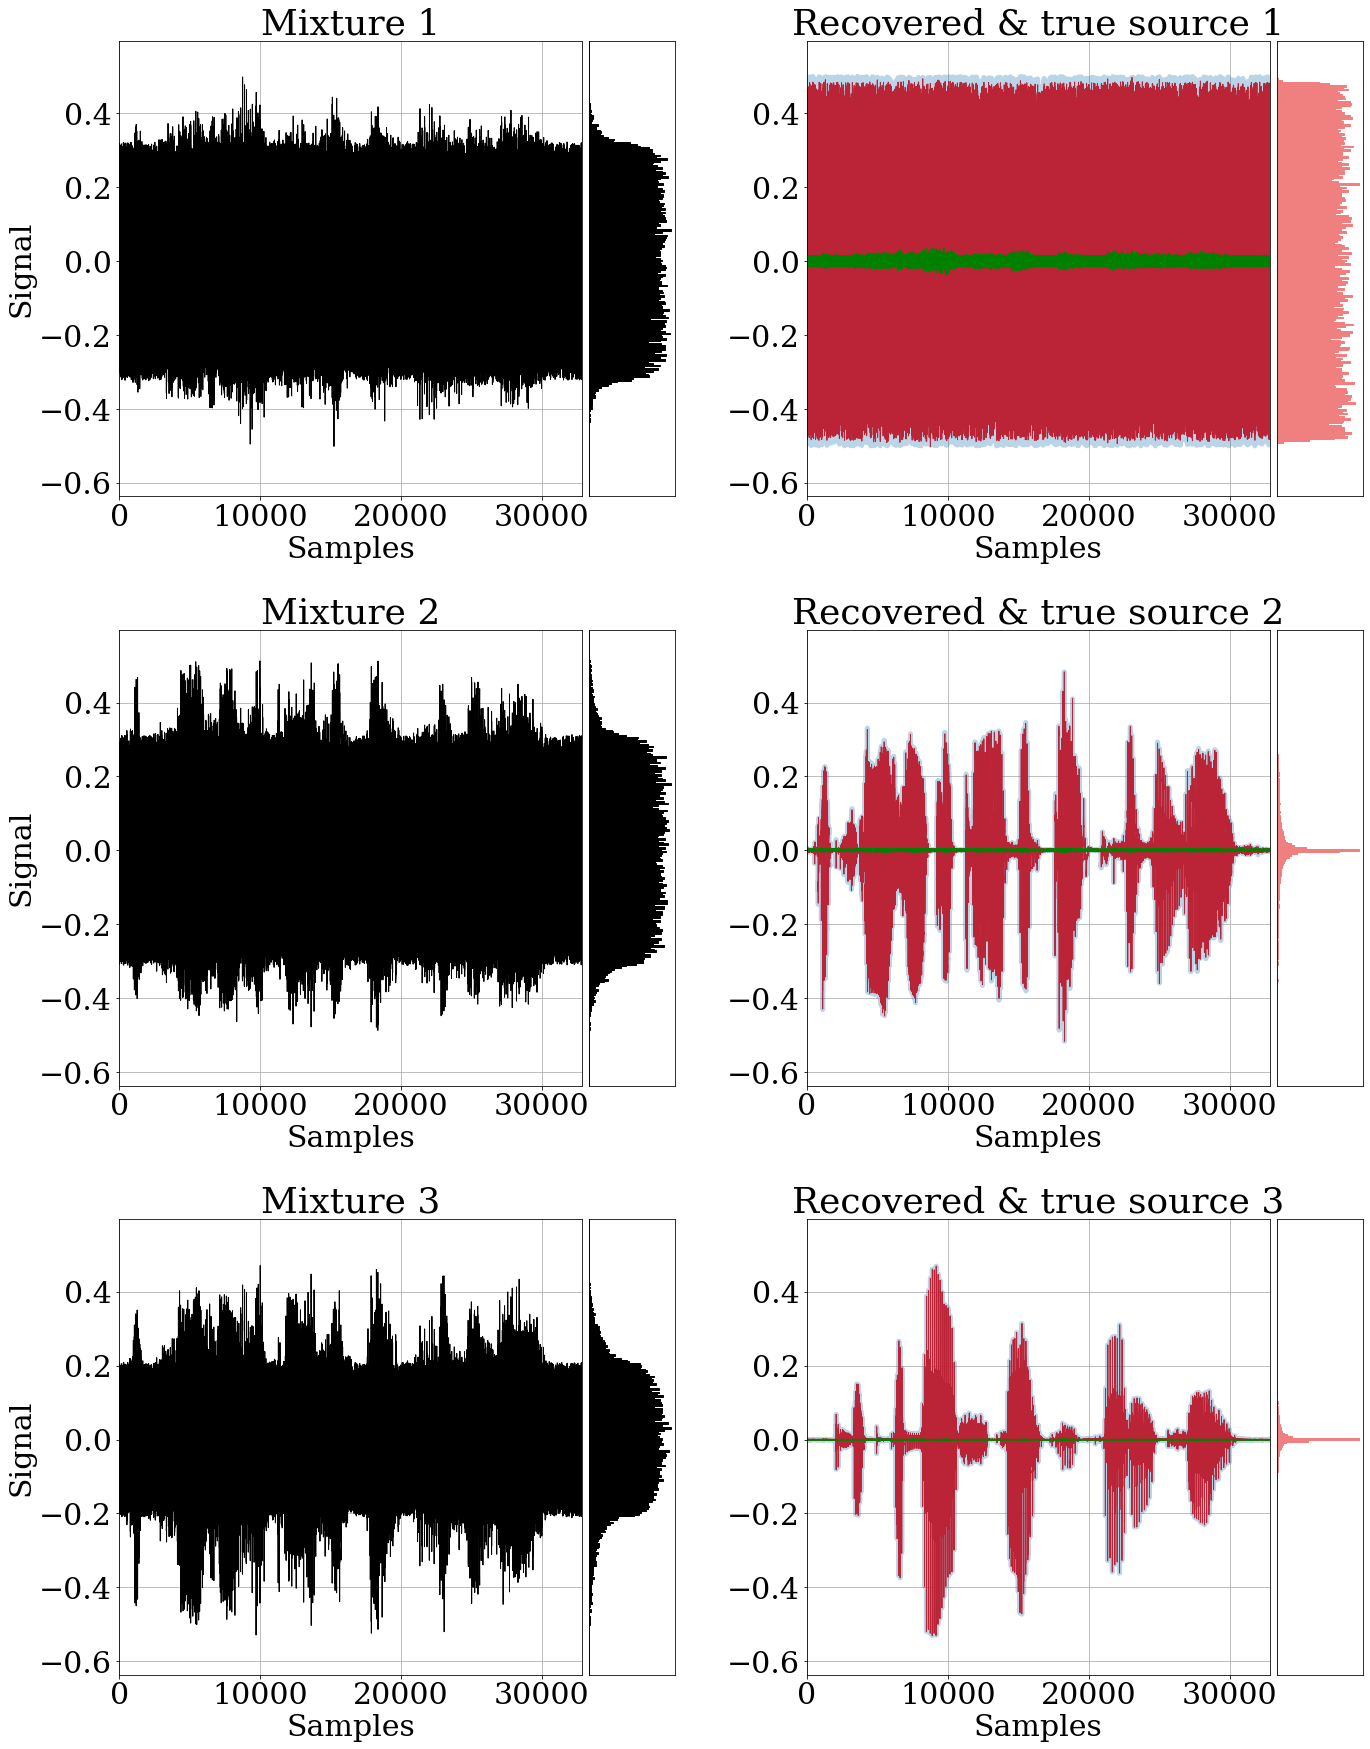

In [17]:
#import numpy as np; np.random.seed(43)

num_samples_plot=32851
min_y_val=1.2*min(Rescaled_fobi.min(),Rescaled_Y.min())
max_y_val=1.2*max(Rescaled_fobi.max(),Rescaled_Y.max())

fig = plt.figure(figsize = (20,25))

plt.rc('font', family='serif')
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)


### Mixtures plot
for iter_subfigure_mixture in range(Rescaled_matrix.shape[1]):

    ax=plt.subplot(Rescaled_matrix.shape[1],2,2*iter_subfigure_mixture+1)

    plt.title('Mixture '+str(iter_subfigure_mixture+1))

    plt.plot(Rescaled_matrix[:num_samples_plot,arg_sort_mixture[iter_subfigure_mixture]],"black", linewidth=1)
    plt.xlabel("Samples")
    plt.ylabel("Signal")
    ax.set_xlim(0,Rescaled_Y[:num_samples_plot,0].shape[0])
    ax.set_ylim(min_y_val,max_y_val)
    ax.grid(True)

    divider = make_axes_locatable(ax)
    axHisty = divider.append_axes("right", size=1.2, pad=0.1, sharey=ax)
    axHisty.hist(Rescaled_matrix[:,arg_sort_mixture[iter_subfigure_mixture]], bins=256, range=(min_y_val, max_y_val),fc='k', ec='k', orientation='horizontal')
    axHisty.grid(True)
    axHisty.get_xaxis().set_visible(False)
    axHisty.get_yaxis().set_visible(False)
    plt.yticks(color='w')
    plt.xticks(color='w')



### Recovered source
for iter_subfigure_source in range(Rescaled_Y.shape[1]):
    

    
    ax = plt.subplot(Rescaled_Y.shape[1],2,2*iter_subfigure_source+2)
    plt.title('Recovered & true source '+str(iter_subfigure_source+1))
    
    ax.plot(Rescaled_Y[:num_samples_plot,arg_sort_SM_ICA[iter_subfigure_source]],"red", linewidth=1,label='Ours')
    
    norm_sign_p = np.linalg.norm(Rescaled_Y[:num_samples_plot,arg_sort_SM_ICA[iter_subfigure_source]]-Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]])
    norm_sign_m = np.linalg.norm(Rescaled_Y[:num_samples_plot,arg_sort_SM_ICA[iter_subfigure_source]]+Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]])

    
    if norm_sign_p<norm_sign_m:
        ax.plot(Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]], linewidth=5, alpha=0.3,label='True')
        ax.plot(Rescaled_Y[:num_samples_plot,arg_sort_SM_ICA[iter_subfigure_source]]-Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]],"green", linewidth=1,label='Residual')
    else:
        ax.plot(-Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]], linewidth=5, alpha=0.3,label='True')
        ax.plot(Rescaled_Y[:num_samples_plot,arg_sort_SM_ICA[iter_subfigure_source]]+Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]],"green", linewidth=1,label='Residual')
        

    plt.xlabel("Samples")

    ax.set_xlim(0,Rescaled_Y[:num_samples_plot,0].shape[0])
    ax.set_ylim(min_y_val,max_y_val)
    ax.grid(True)

    divider = make_axes_locatable(ax)
    axHisty = divider.append_axes("right", size=1.2, pad=0.1, sharey=ax)
    axHisty.hist(Rescaled_Y[:,arg_sort_SM_ICA[iter_subfigure_source]], bins=256, range=(min_y_val, max_y_val),fc='lightcoral',color="lightcoral", ec='lightcoral', orientation='horizontal')#ec='lightcoral'

    axHisty.get_xaxis().set_visible(False)
    axHisty.get_yaxis().set_visible(False)

plt.tight_layout()



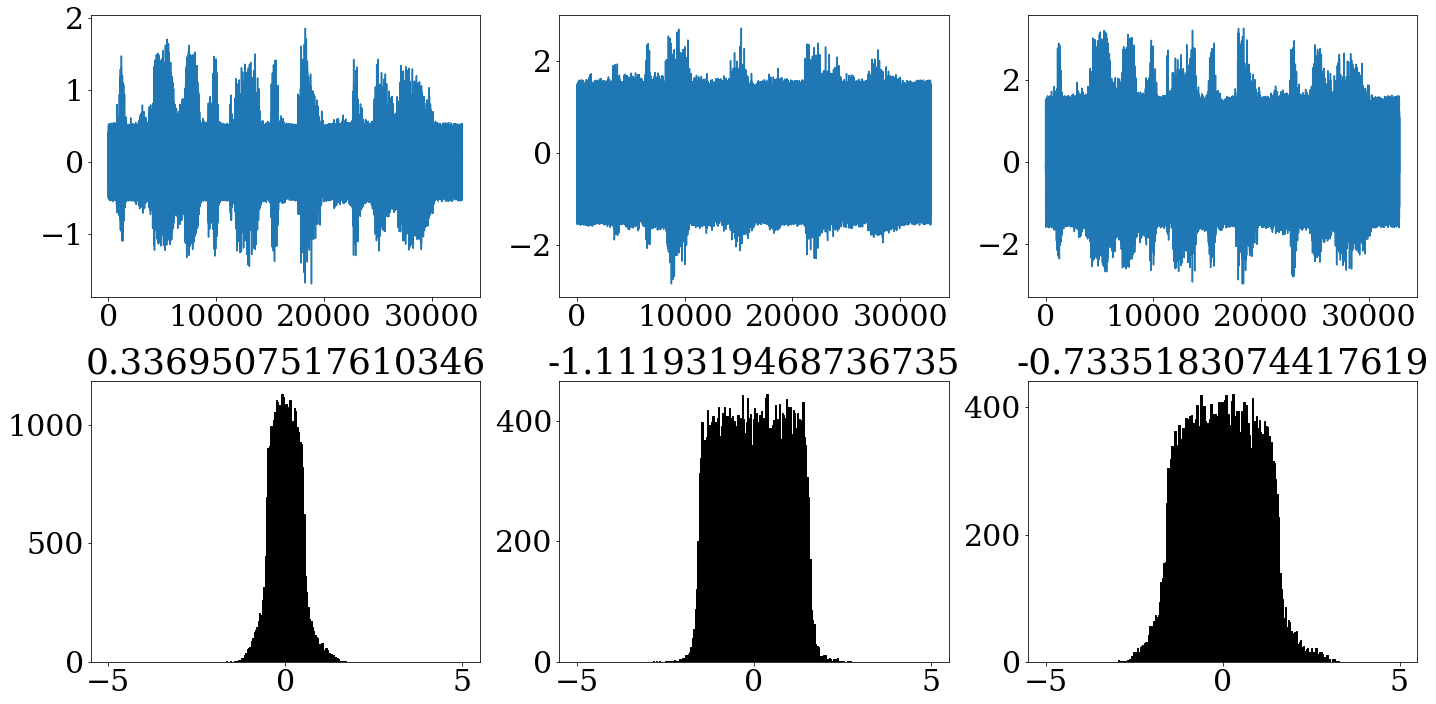

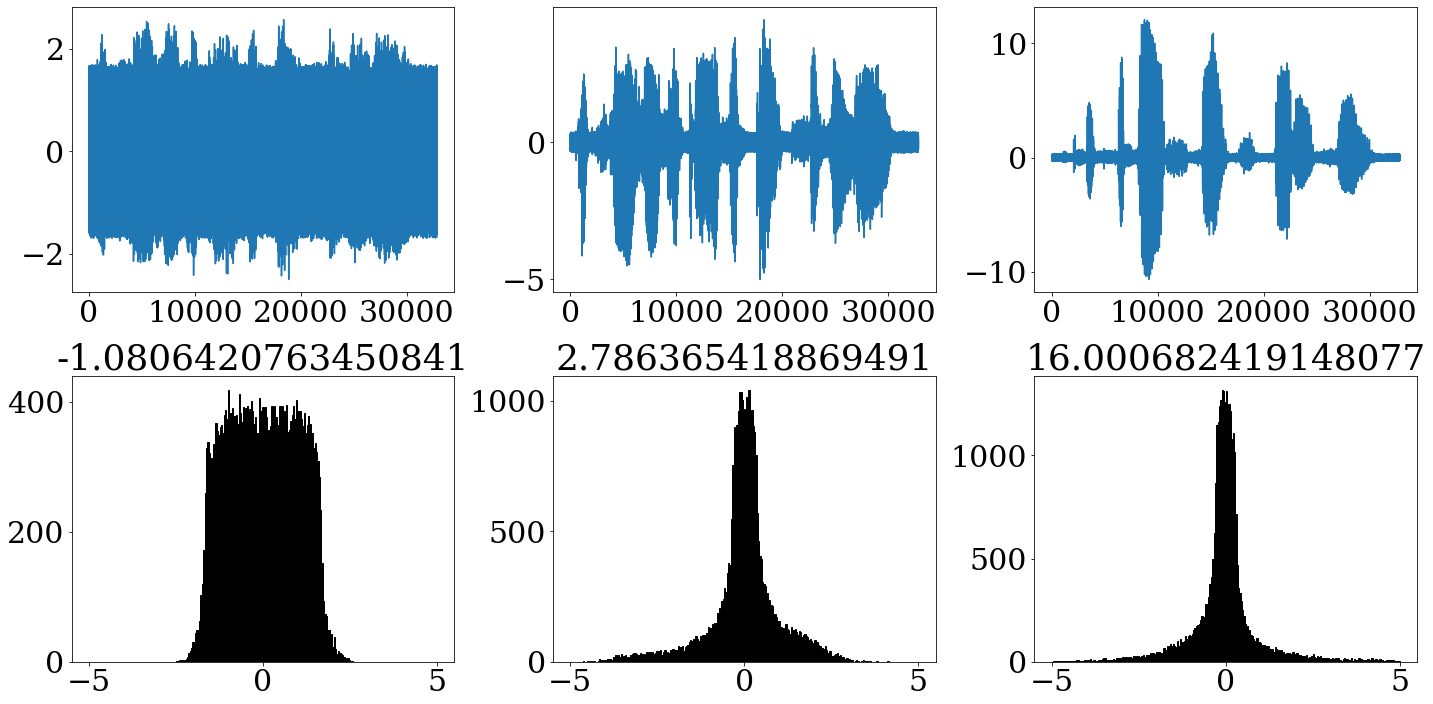

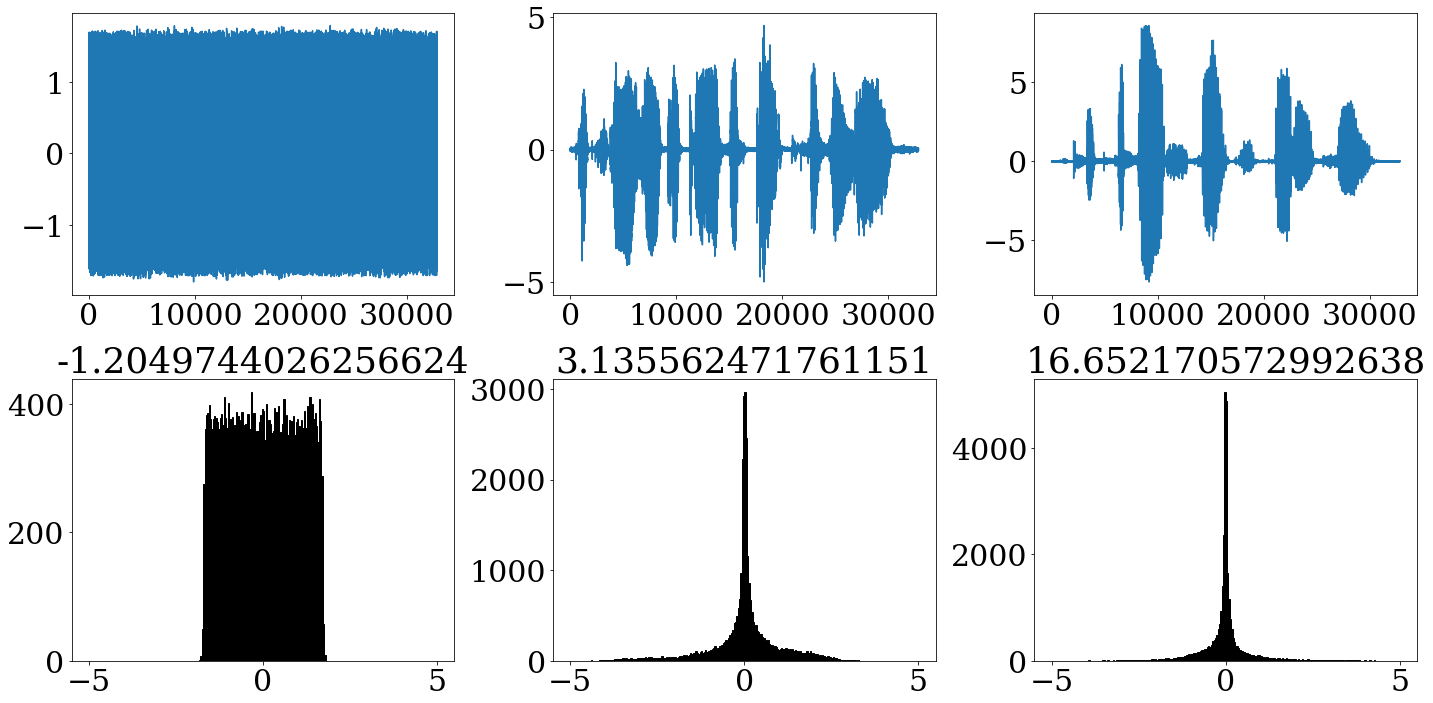

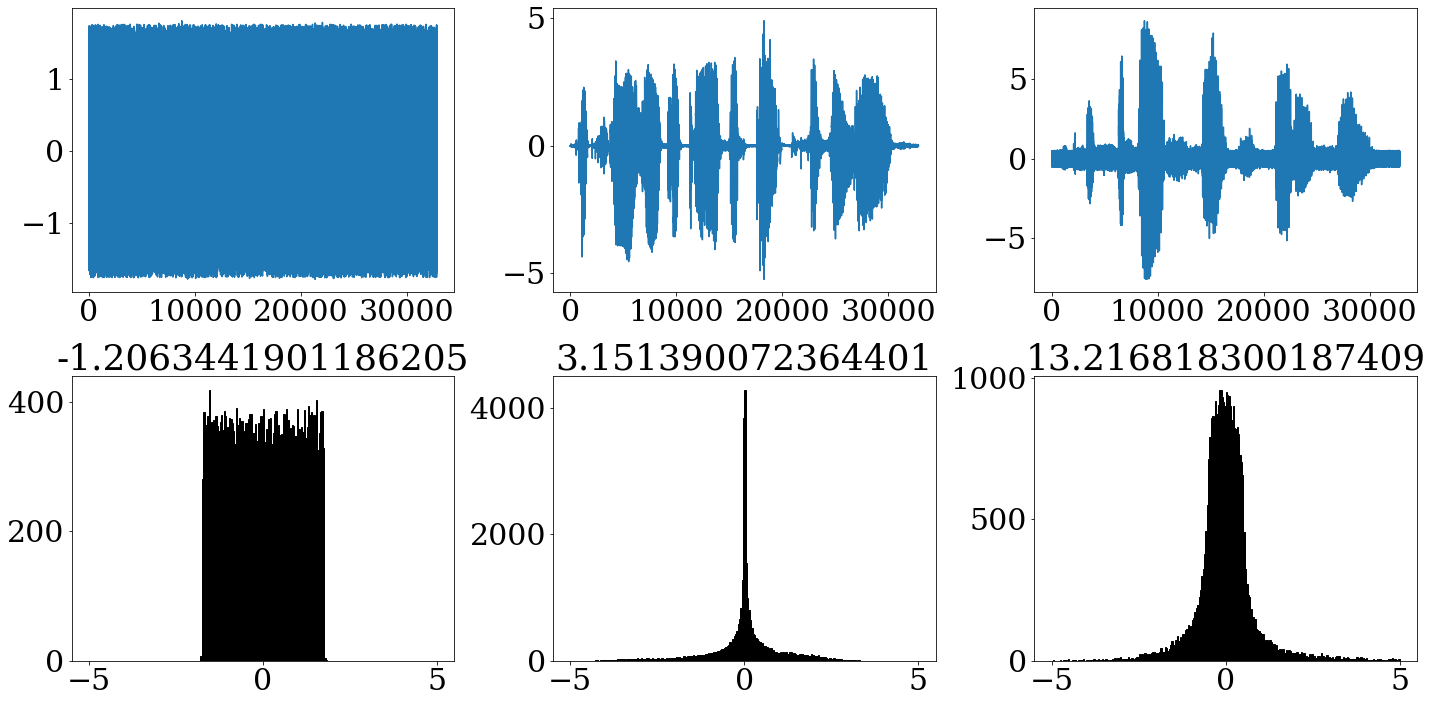

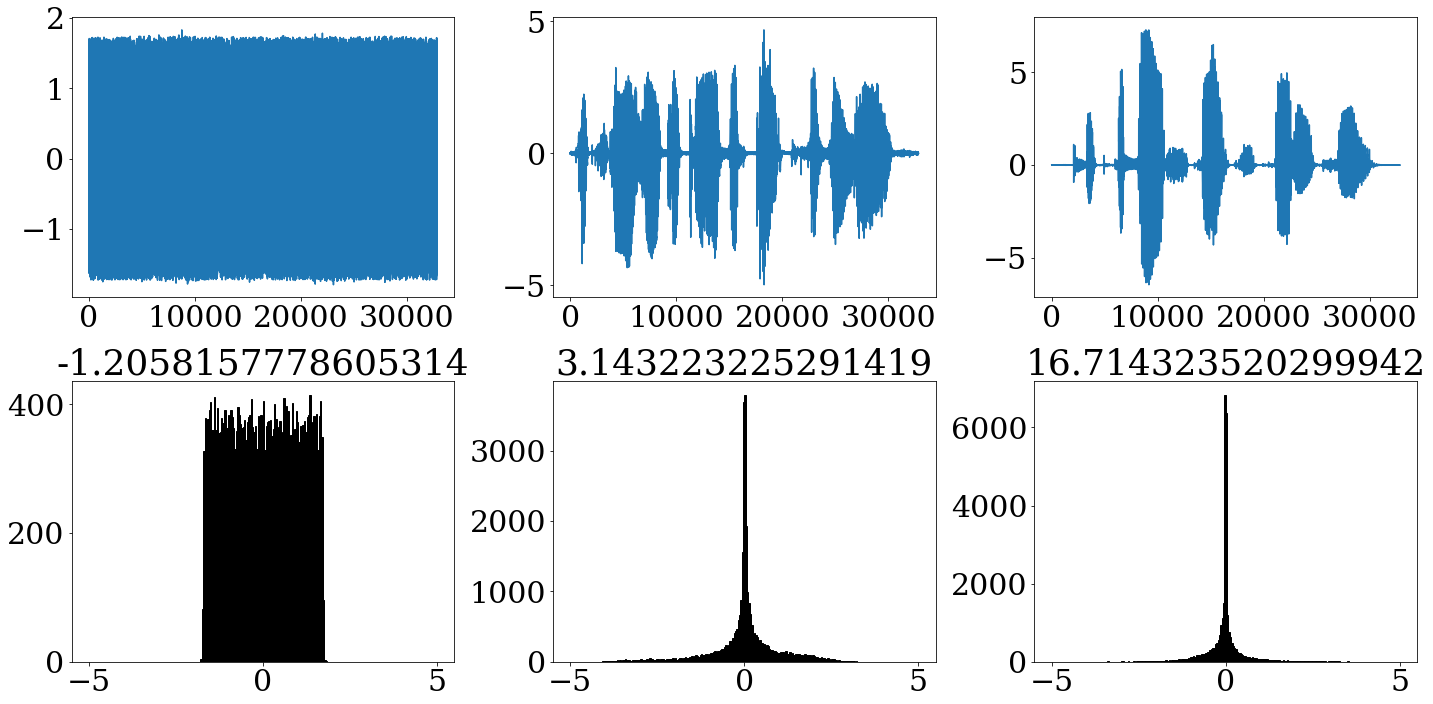

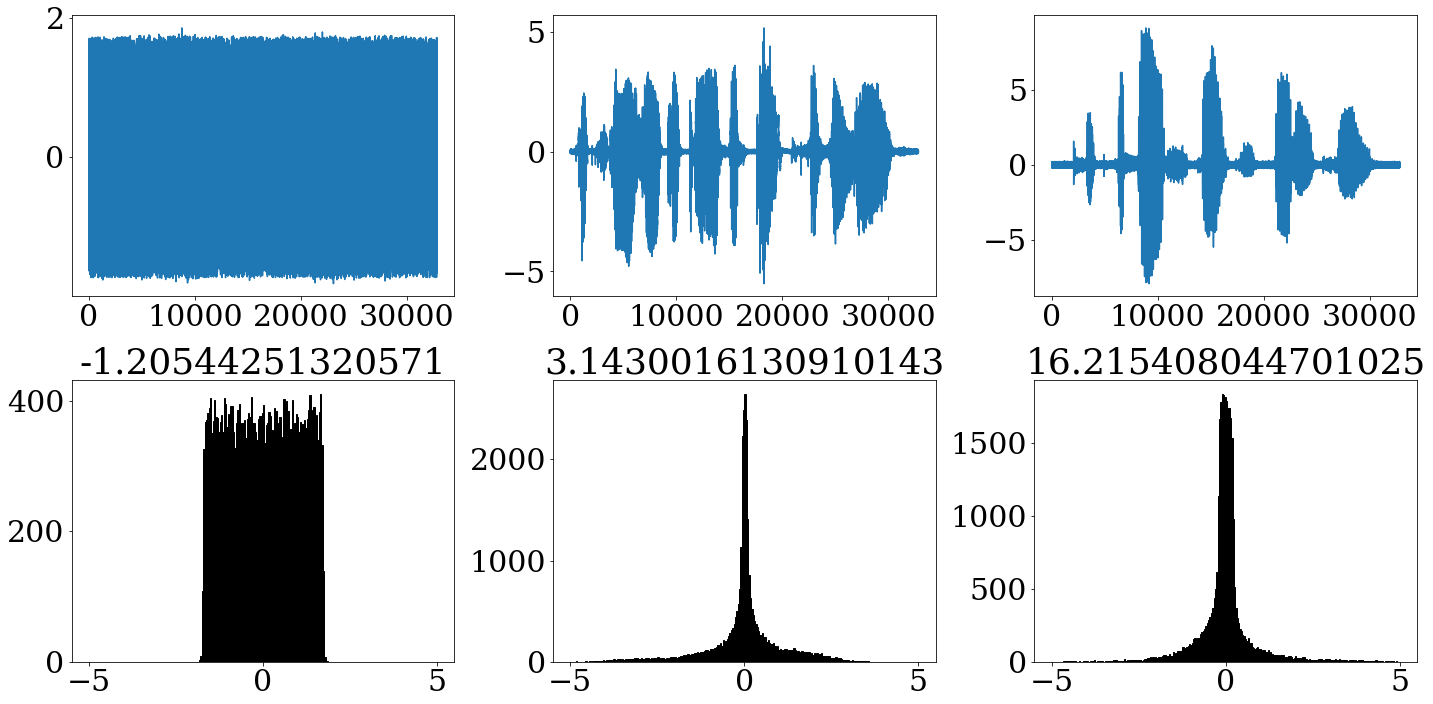

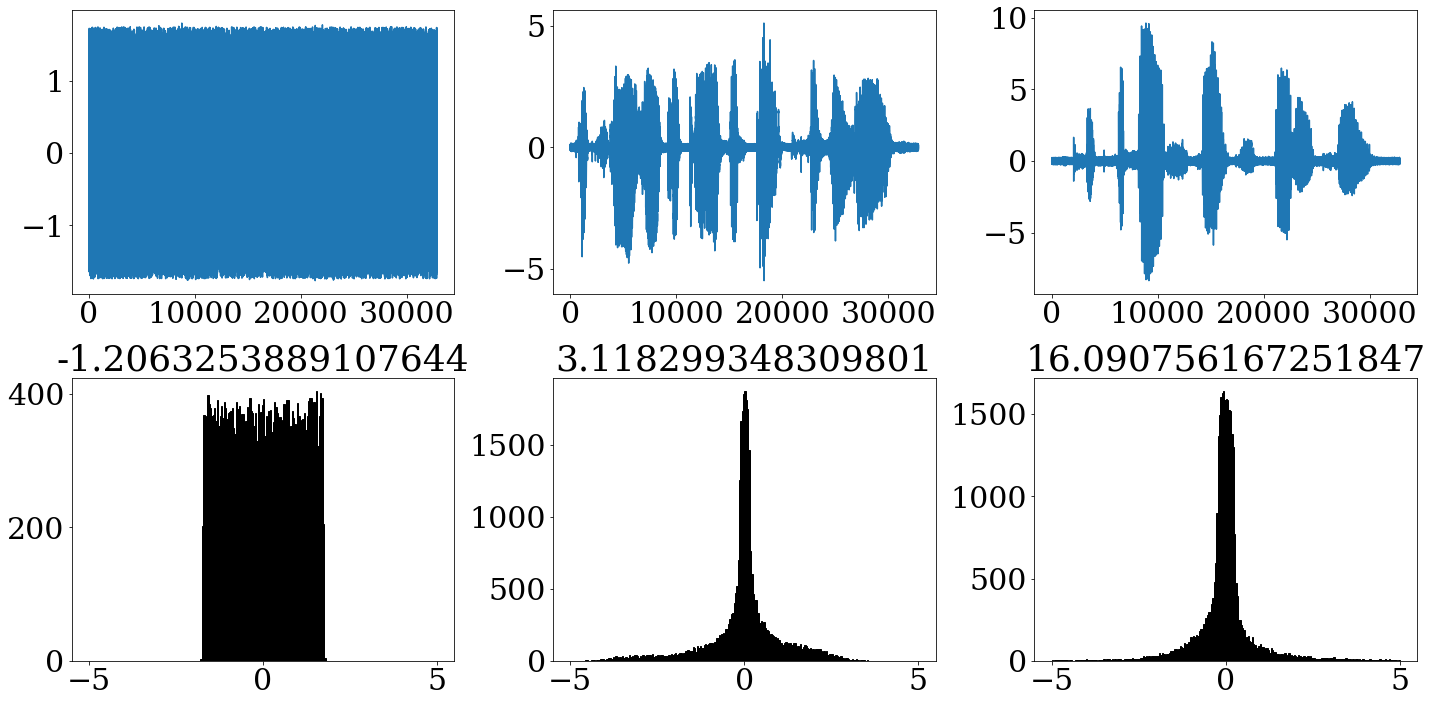

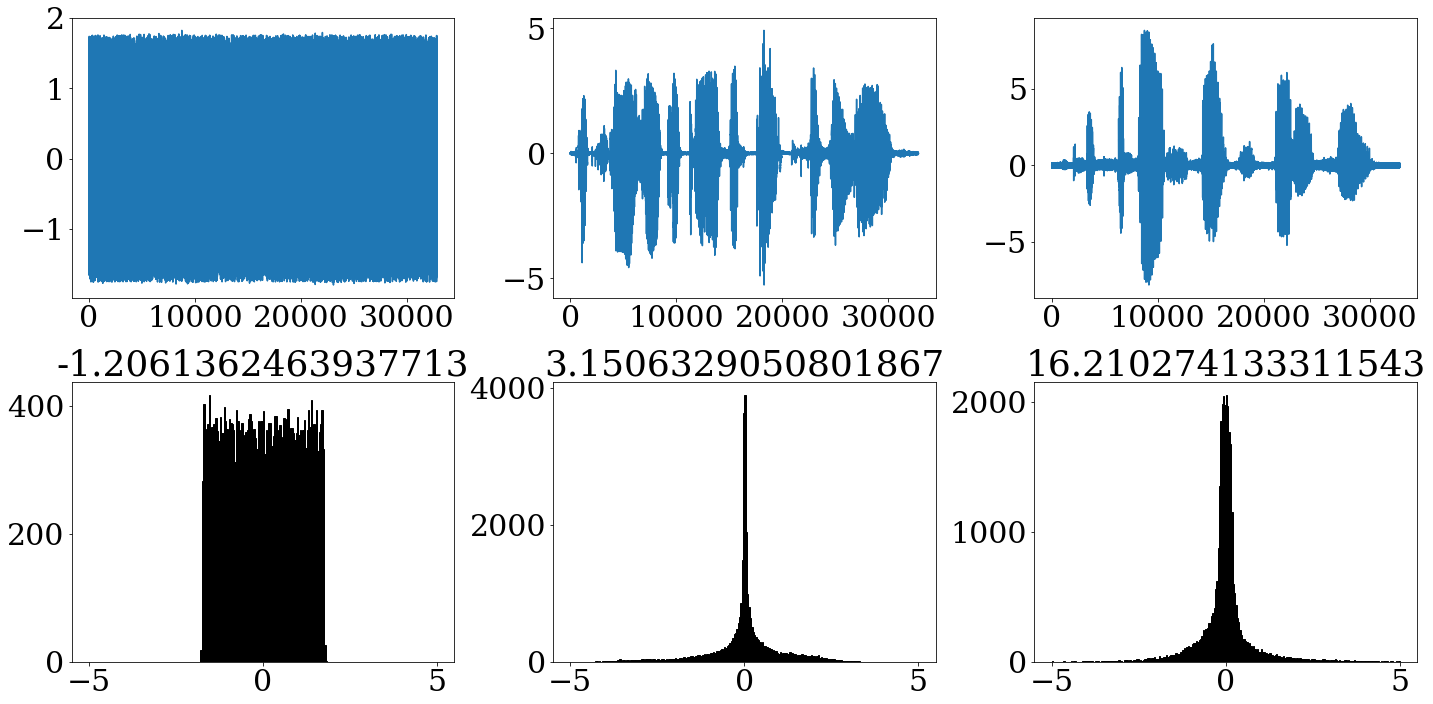

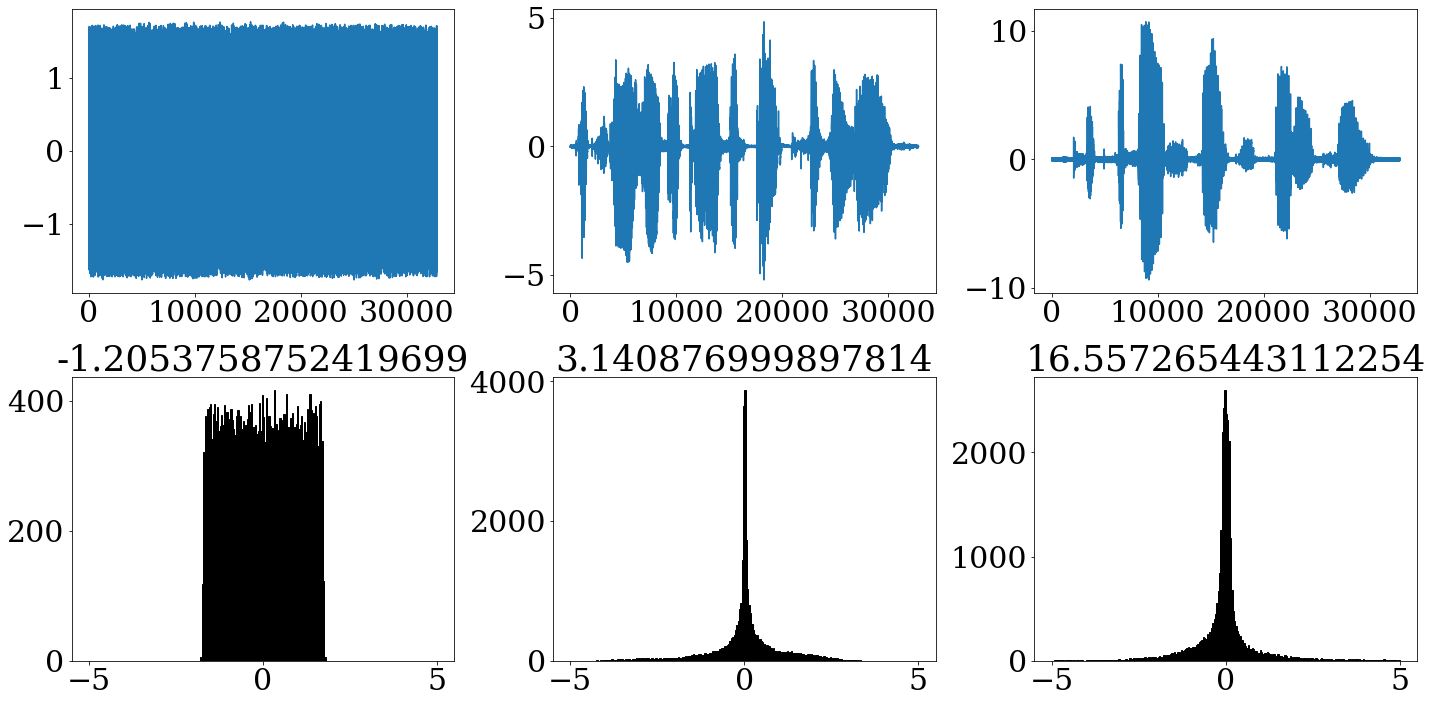

KeyboardInterrupt: 

In [32]:


iter_idx = np.array([])
SM_ICA_error = np.zeros(1000000)
SM_ICA_error_bis = np.zeros(1000000)

#all_indices_err=np.ceil(np.geomspace(1.0, 100000.0, num=50,endpoint=True))
all_indices_err=np.ceil(np.linspace(1.0, 10000000.0, num=100,endpoint=True))


W_on_SL=np.random.randn(size_output,size_input1)

# initialize M PSD
Gen_psd_M = np.random.randn(1000,size_output)
C = np.cov(Gen_psd_M.T)
M_on_SL =np.eye(size_output,size_output)


#Lambda_PCA=(kurtosis(fobiS.T,fisher=True))# has negative values
#Lambda_PCA=[1.9,1.5,1.3,1.2]
Lambda_PCA=(kurtosis(fobiS.T,fisher=False))
#Lambda_PCA=kurtosis(S, fisher=False)

#Lambda_PCA=[1, 1, 1, 1]


#X_SM_temp=whiteMatrix
X_SM_temp=X_SM
for loop_data in range(10000):
    
    if loop_data%10==0:
        Y_SL_off =np.linalg.inv(M_on_SL) @ W_on_SL @ X_SM_temp

        figure = plt.figure(figsize=(20,10))
        for iter_loop in range(size_output):
            plt.subplot(2,3,iter_loop+1)
            plt.plot((Y_SL_off)[iter_loop])
            plt.subplot(2,3,iter_loop+1+3)
            plt.hist(Y_SL_off[iter_loop], bins=256, range=(-5.0, 5.0), fc='k', ec='k')
            plt.title(str(kurtosis(Y_SL_off[iter_loop],fisher=True)))

        figure.tight_layout(pad=0.5)
        plt.show()

    new_idx= np.random.permutation(X_SM.shape[1])
    
    for iter in range(X_SM.shape[1]):

        x_SM=X_SM_temp[:,new_idx[iter]]
        
        C_SL=W_on_SL @ x_SM
        y_SL_t= np.linalg.inv(M_on_SL) @ C_SL

        nonlin_alpha=np.sum(y_SL_t**2)
        #eta=5*10**-3;
        #eta_t =1/((iter+loop_data*X_SM.shape[1]) *10**-5 +5000)
        #t =loop_data*X_SM.shape[1]
        #eta_t= 1*1e-4/(1+1e-3*(t**1/10))
        #eta=1*10**-5 # for whiteMatrix
        eta=2*10**-5 # for matrix
        eta_t =eta
        tau=1.5

        W_on_SL= W_on_SL + 2*eta_t*( np.outer(y_SL_t,x_SM) - np.outer(nonlin_alpha*(np.diag(Lambda_PCA)@C_SL),x_SM))
        M_on_SL= M_on_SL + (eta_t/tau)*(np.outer(y_SL_t,y_SL_t) - np.eye(Lambda_PCA.shape[0]))

    

        
    


In [33]:
# Rescaling for visualization purposes

Y_SL_off =np.linalg.inv(M_on_SL) @ W_on_SL @ X_SM_temp

Rescaled_Y_on=(((np.diag(1/(Y_SL_off.max(axis=1)-Y_SL_off.min(axis=1)) ))@( Y_SL_off )).T)
kurt_SM_ICA_on=np.zeros(fobiS.shape[0])

for iter_rg in range(fobiS.shape[0]):
    kurt_SM_ICA_on[iter_rg]= kurtosis(Rescaled_Y_on[:,iter_rg],fisher=True)
    
    
arg_sort_SM_ICA_on = np.argsort(kurt_SM_ICA_on)



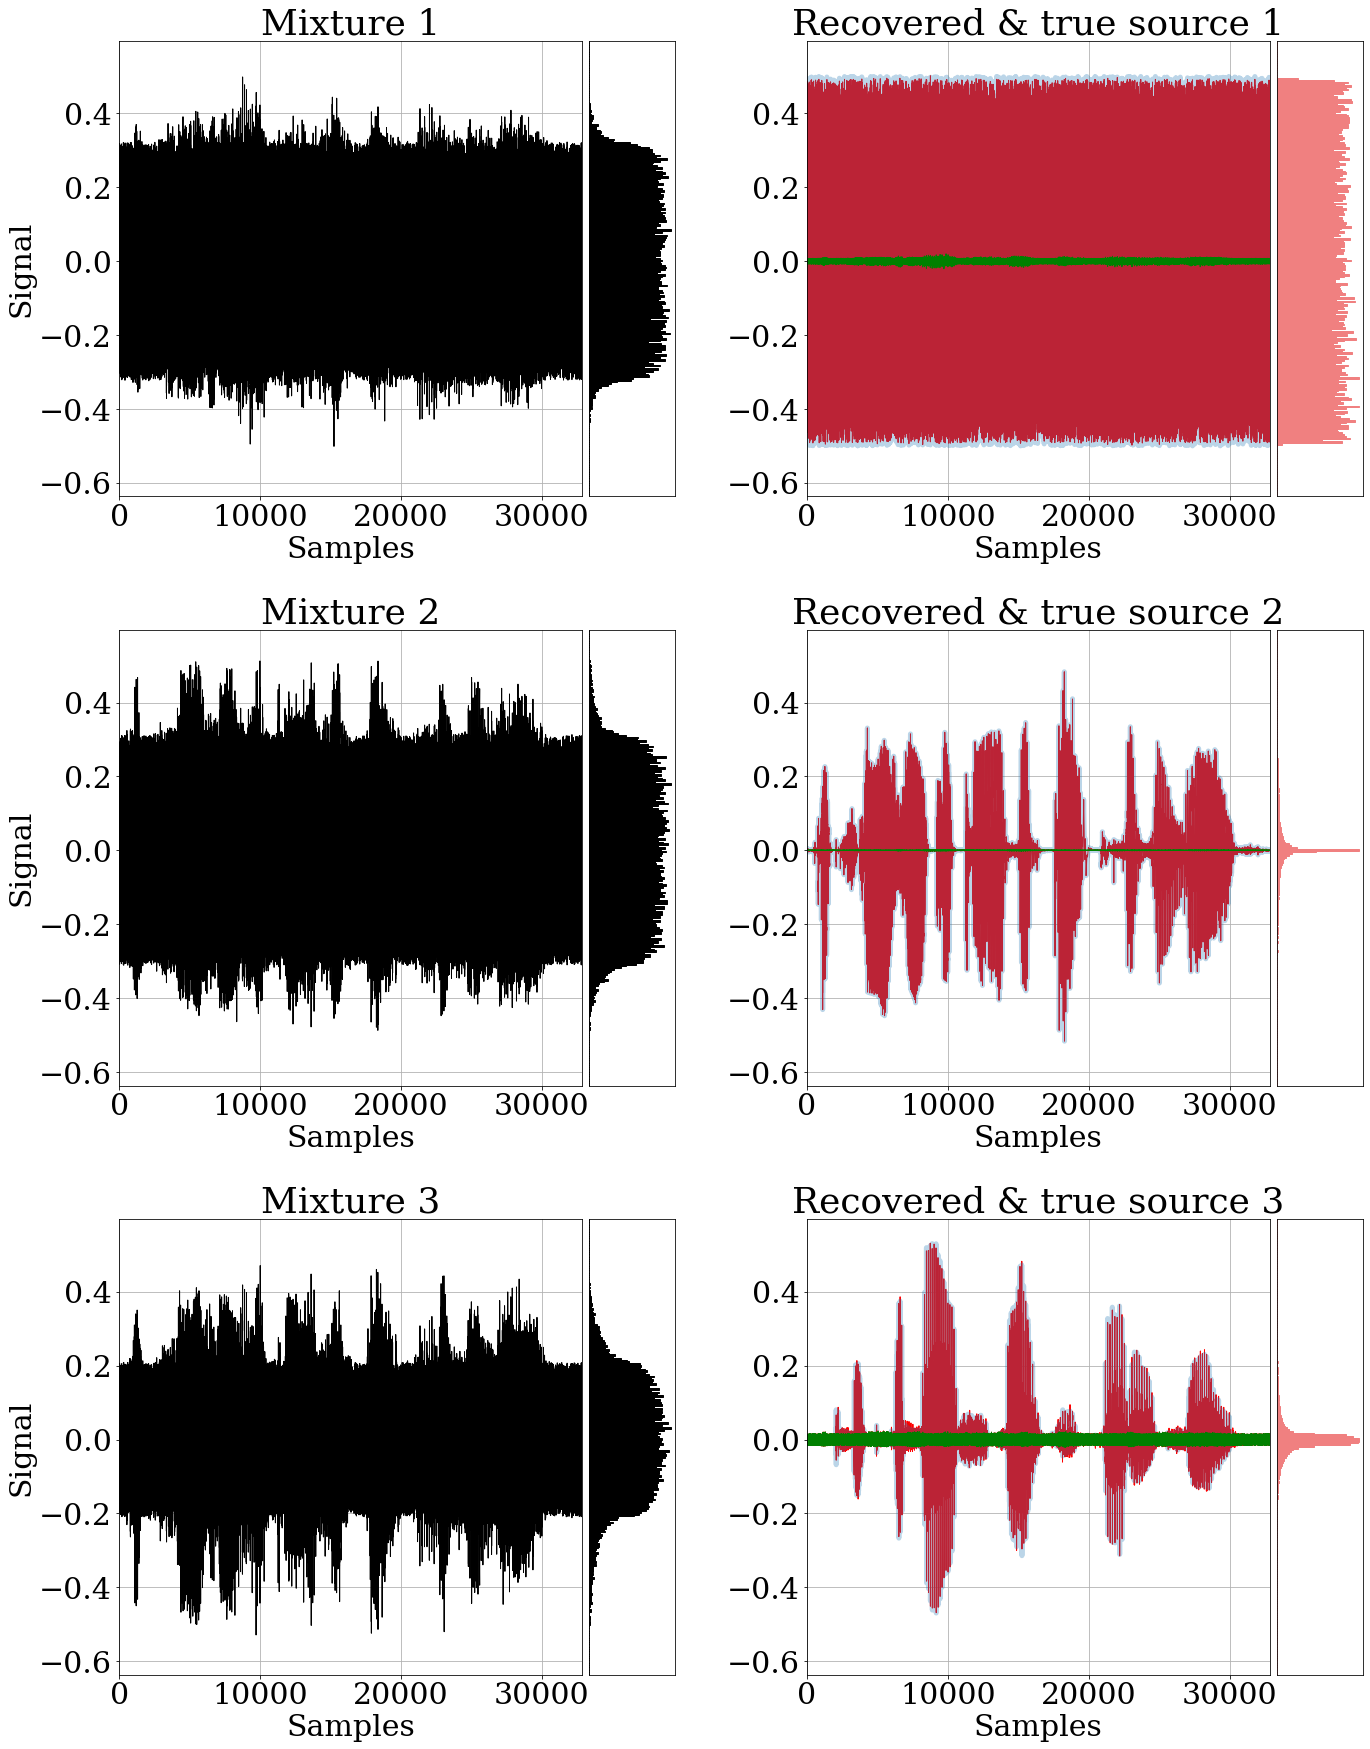

In [36]:
#import numpy as np; np.random.seed(43)

num_samples_plot=32851
min_y_val=1.2*min(Rescaled_fobi.min(),Rescaled_Y.min())
max_y_val=1.2*max(Rescaled_fobi.max(),Rescaled_Y.max())

fig = plt.figure(figsize = (20,25))

plt.rc('font', family='serif')
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)


### Mixtures plot
for iter_subfigure_mixture in range(Rescaled_matrix.shape[1]):

    ax=plt.subplot(Rescaled_matrix.shape[1],2,2*iter_subfigure_mixture+1)

    plt.title('Mixture '+str(iter_subfigure_mixture+1))

    plt.plot(Rescaled_matrix[:num_samples_plot,arg_sort_mixture[iter_subfigure_mixture]],"black", linewidth=1)
    plt.xlabel("Samples")
    plt.ylabel("Signal")
    ax.set_xlim(0,Rescaled_Y[:num_samples_plot,0].shape[0])
    ax.set_ylim(min_y_val,max_y_val)
    ax.grid(True)

    divider = make_axes_locatable(ax)
    axHisty = divider.append_axes("right", size=1.2, pad=0.1, sharey=ax)
    axHisty.hist(Rescaled_matrix[:,arg_sort_mixture[iter_subfigure_mixture]], bins=256, range=(min_y_val, max_y_val),fc='k', ec='k', orientation='horizontal')
    axHisty.grid(True)
    axHisty.get_xaxis().set_visible(False)
    axHisty.get_yaxis().set_visible(False)
    plt.yticks(color='w')
    plt.xticks(color='w')



### Recovered source
for iter_subfigure_source in range(Rescaled_Y_on.shape[1]):
    

    
    ax = plt.subplot(Rescaled_Y_on.shape[1],2,2*iter_subfigure_source+2)
    plt.title('Recovered & true source '+str(iter_subfigure_source+1))
    
    ax.plot(Rescaled_Y_on[:num_samples_plot,arg_sort_SM_ICA_on[iter_subfigure_source]],"red", linewidth=1,label='Ours')
    
    norm_sign_p = np.linalg.norm(Rescaled_Y_on[:num_samples_plot,arg_sort_SM_ICA_on[iter_subfigure_source]]-Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]])
    norm_sign_m = np.linalg.norm(Rescaled_Y_on[:num_samples_plot,arg_sort_SM_ICA_on[iter_subfigure_source]]+Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]])

    
    if norm_sign_p<norm_sign_m:
        ax.plot(Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]], linewidth=5, alpha=0.3,label='True')
        ax.plot(Rescaled_Y_on[:num_samples_plot,arg_sort_SM_ICA_on[iter_subfigure_source]]-Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]],"green", linewidth=1,label='Residual')
    else:
        ax.plot(-Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]], linewidth=5, alpha=0.3,label='True')
        ax.plot(Rescaled_Y_on[:num_samples_plot,arg_sort_SM_ICA_on[iter_subfigure_source]]+Rescaled_sources[:num_samples_plot,arg_sort_sources[iter_subfigure_source]],"green", linewidth=1,label='Residual')
        

    plt.xlabel("Samples")

    ax.set_xlim(0,Rescaled_Y_on[:num_samples_plot,0].shape[0])
    ax.set_ylim(min_y_val,max_y_val)
    ax.grid(True)

    divider = make_axes_locatable(ax)
    axHisty = divider.append_axes("right", size=1.2, pad=0.1, sharey=ax)
    axHisty.hist(Rescaled_Y_on[:,arg_sort_SM_ICA_on[iter_subfigure_source]], bins=256, range=(min_y_val, max_y_val),fc='lightcoral',color="lightcoral", ec='lightcoral', orientation='horizontal')#ec='lightcoral'

    axHisty.get_xaxis().set_visible(False)
    axHisty.get_yaxis().set_visible(False)

plt.tight_layout()

#fig.savefig('fig_audio_sep_online_v1.pdf')
